
# Вариант 6
# Количество кластеров: 3
# Количество признаков: 4
# Дисперсия: 1.5

А) Выбрать среду программирования для языка Python.
Б) Получить набор данных из 100 наблюдений с параметрами, согласно номеру варианта (таблица 3.1).
С использованием Python провести кластерный и дискриминантный анализ данных. При этом необходимо:
    − получить значения основных показателей описательной статистики и построить диаграммы рассеяния для всех признаков;
    − выполнить стандартизацию данных;
    − построить и вывести на экран дендрограмму;
    − провести кластеризацию данных методом k-средних, вывести на экран результаты кластеризации;
      показать на этих же диаграммах средние значения для каждого кластера;
    − построить диаграмму средних значений для каждого кластера и каждого измерения;
    − создать инструмент для графического отображения результатов дискриминантного анализа – решающих поверхностей и данных;
    − провести линейный дискриминантный анализ данных, для каждой пары признаков:
      вывести на экран решающие поверхности и данные, оценить точность;
    − провести квадратичный дискриминантный анализ данных, для каждой пары признаков:
      вывести на экран решающие поверхности и данные, оценить точность; сравнить с точностью линейного дискриминантного анализа.
Г) Выполнить анализ полученных на каждом этапе результатов и оформить отчет по лабораторной работе.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

In [20]:
N = 3
D = 4

X,y=make_blobs(n_samples=100,centers=N,n_features=D,random_state=None,cluster_std=1.5 ** 0.5)
df=pd.DataFrame(X)
df['Class']=y

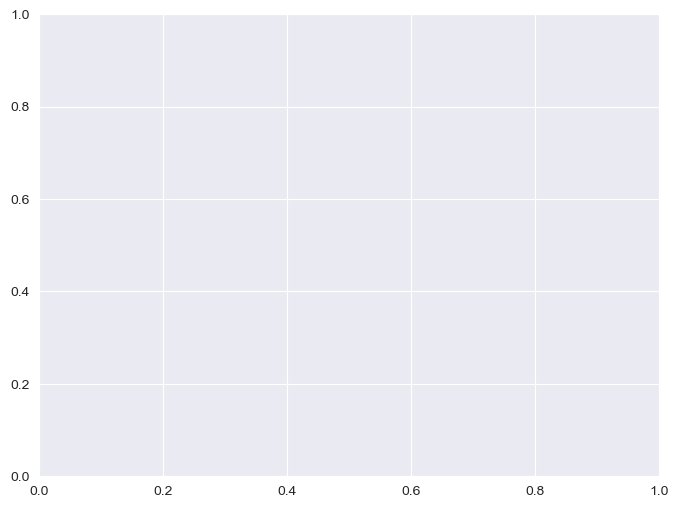

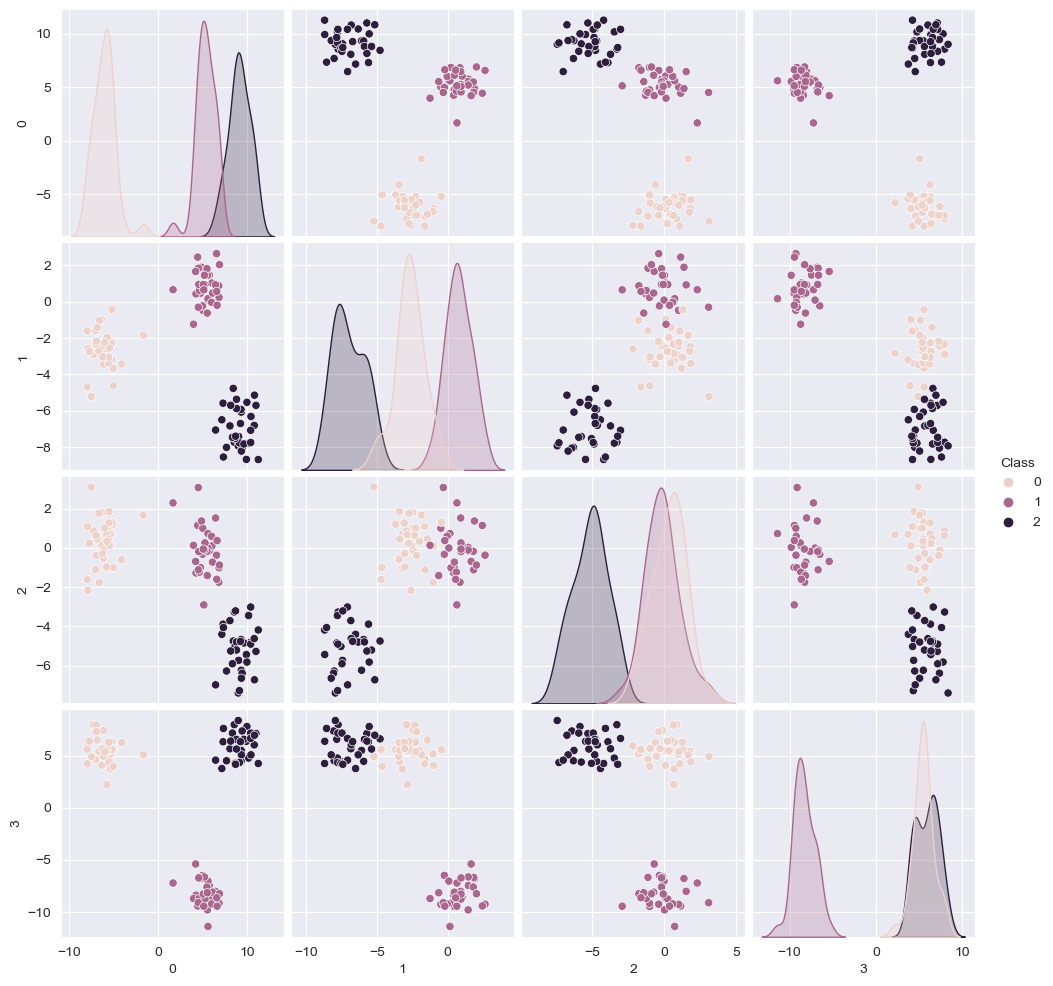

In [21]:
sns.pairplot(df, hue='Class')
plt.show()

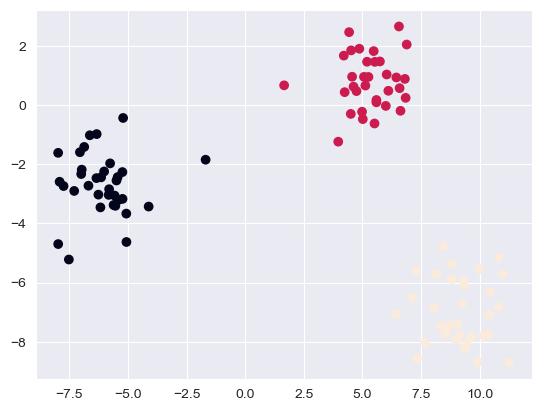

In [22]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [23]:
sc = StandardScaler()
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()

,0,1,2,3
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,6.661338e-18,-3.508305e-16,1.332268e-16,4.329870e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.619163e+00,-1.734499e+00,-2.118849e+00,-1.861276e+00
25%,-1.236048e+00,-8.883123e-01,-9.601797e-01,-1.248723e+00
50%,3.841296e-01,8.869641e-02,3.026861e-01,5.591729e-01
75%,8.608994e-01,9.250748e-01,7.631504e-01,7.725311e-01
max,1.298508e+00,1.692582e+00,1.734773e+00,1.086013e+00


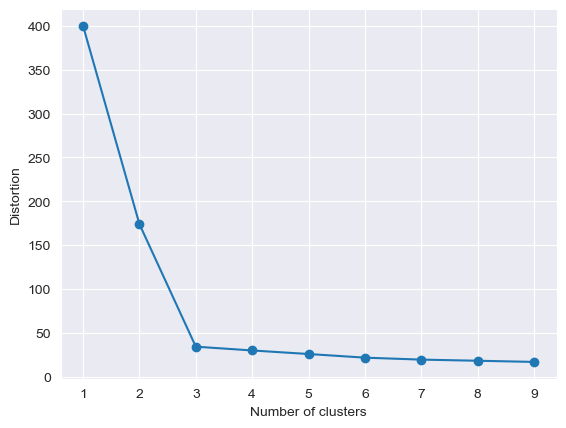

Сумма квадратов расстояний до центров кластеров: 34.06


In [24]:
#Используя сумму квадратов растояний до центров оценить качество кластеризации
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    km.fit(df_t)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
#на графике видно, что после 3 точек сумма квадратов уменьшается медленно, значит число кластеров подобрано верно

#Другой метод
kmeans = KMeans(n_clusters=N, n_init=10)
kmeans.fit(df_t)
clusters_inertia = kmeans.inertia_
#Чем меньше значение clusters_inertia, тем лучше кластеризация

print(f'Сумма квадратов расстояний до центров кластеров: {clusters_inertia:.2f}')

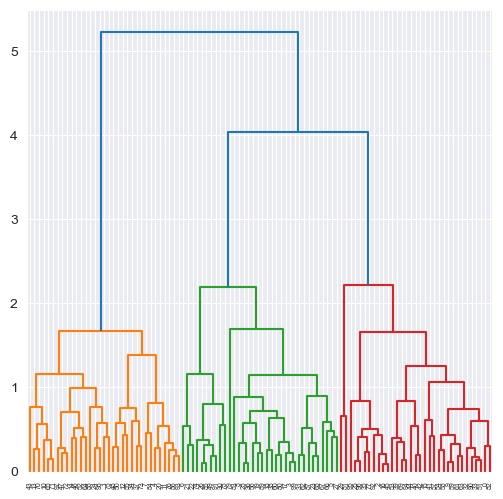

In [25]:
row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(6,6))
dendrogram(mergings)
plt.show()

In [26]:
# добавить агламератив кластеринг
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3,linkage='single').fit(df_t)
print(clustering.labels_)

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_t)
y_pred = clustering.labels_
#Создаем confusion matrix
cm = confusion_matrix(y, y_pred)
#Вывод матрицы ошибок
print("Confusion matrix:\n", cm)

[2 1 2 0 1 0 0 1 0 2 1 1 1 1 1 2 2 0 0 0 1 0 0 0 1 2 0 0 0 2 0 0 2 2 1 2 0
 1 0 2 2 2 2 1 2 2 1 1 1 0 1 2 1 2 2 1 0 2 2 2 0 2 0 2 1 1 0 0 0 2 1 1 1 1
 0 1 1 2 0 0 0 2 2 0 1 0 1 0 1 0 2 0 2 1 2 2 2 1 1 0]
Confusion matrix:
 [[34  0  0]
 [ 0  0 33]
 [ 0 33  0]]


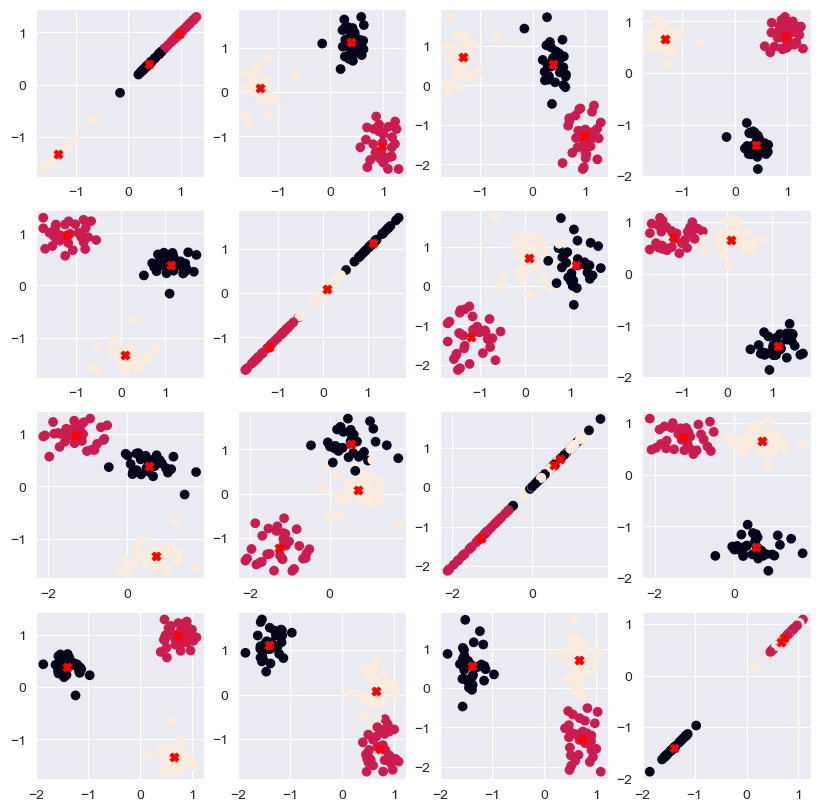

In [27]:
# Выполним кластеризацию методом k-средних, выведем диаграммы рассеяния, нанесем центры кластеров:

model = KMeans(n_clusters=N, max_iter=1000)
model.fit(df_t)
y=model.predict(df_t)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(df_t[i],df_t[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j],marker='X', c='red')
plt.show()

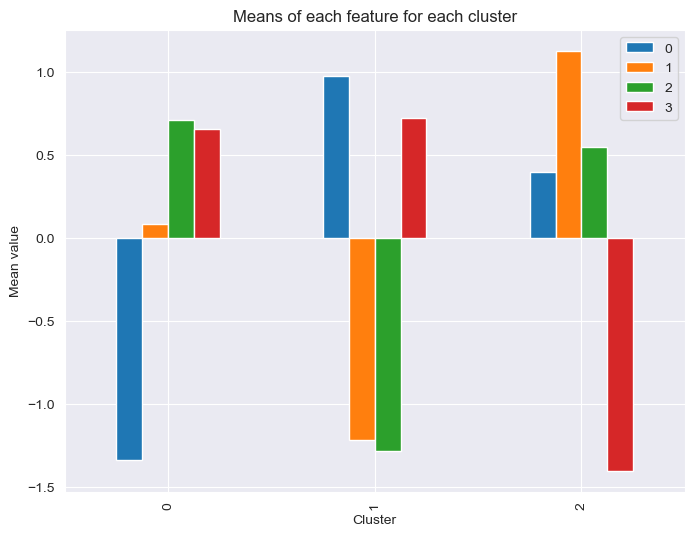

In [28]:
import matplotlib.pyplot as plt

# проводим кластеризацию (пример с AgglomerativeClustering)
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df_t)
df_t['Cluster'] = clustering.labels_

# вычисляем среднее значение для каждого признака и каждого кластера
cluster_means = df_t.groupby('Cluster').mean()

# выводим график средних значений для каждого признака каждого кластера
fig, ax = plt.subplots(figsize=(8,6))
cluster_means.plot(kind='bar', ax=ax)
ax.set_xlabel('Cluster')
ax.set_ylabel('Mean value')
ax.set_title('Means of each feature for each cluster')
plt.show()


# Создадим функцию, реализующую инструмент для графического отображения результатов дискриминантного анализа, – решающих поверхностей и отображения данных:

In [29]:
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    x=df_t[[field1, field2]].values #определим данные
    df_t['Class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный
    model=type_model
    #построим модель
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t[field1].min()-1, df_t[field1].max()+1
    min2, max2 = df_t[field2].min()-1, df_t[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t[field1],df_t[field2],c=y)
    #оценка точности модели
    plt.title(model.score(x,y))
    return splot


# Проведем линейный дискриминантный анализ данных. Для каждой пары признаков выведем на экран решающие поверхности и данные, для каждой пары признаков оценим точность модели дискриминантного анализа

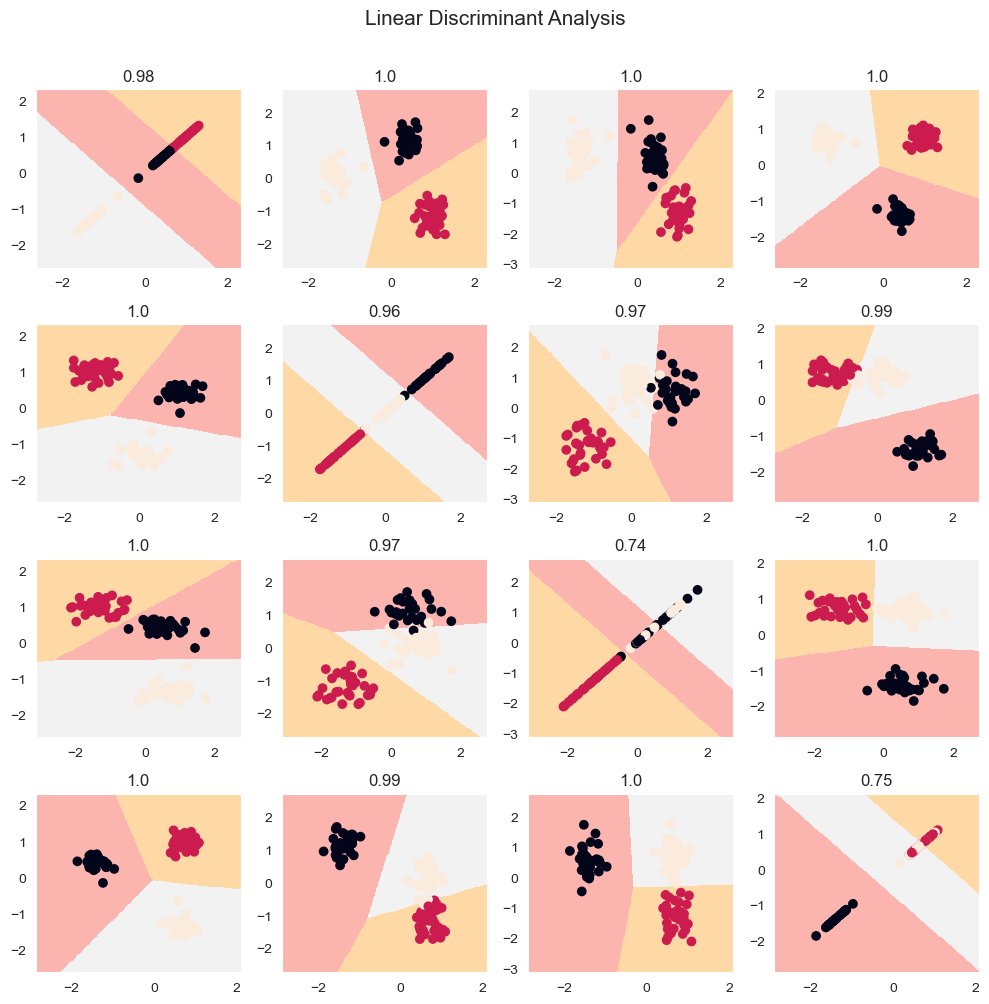

In [30]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis',y=1, fontsize=15)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,lda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

# Разделяем данные на признаки и целевую переменную
X = df_t.drop('Class', axis=1)
y = df_t['Class']

# Создаем объект LDA и обучаем его на данных
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Получаем предсказанные метки классов
y_pred = lda.predict(X)

# Вычисляем confusion matrix
cm = confusion_matrix(y, y_pred)

# Выводим confusion matrix
print("Confusion matrix:\n", cm)
# #Вывод точности классификации
print("Accuracy score:", accuracy_score(y, y_pred))

Confusion matrix:
 [[33  0  0]
 [ 0 33  0]
 [ 0  0 34]]
Accuracy score: 1.0


/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Выполним предыдущий пункт, используя модель квадратичного дискриминантного анализа

/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/malinatrash/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


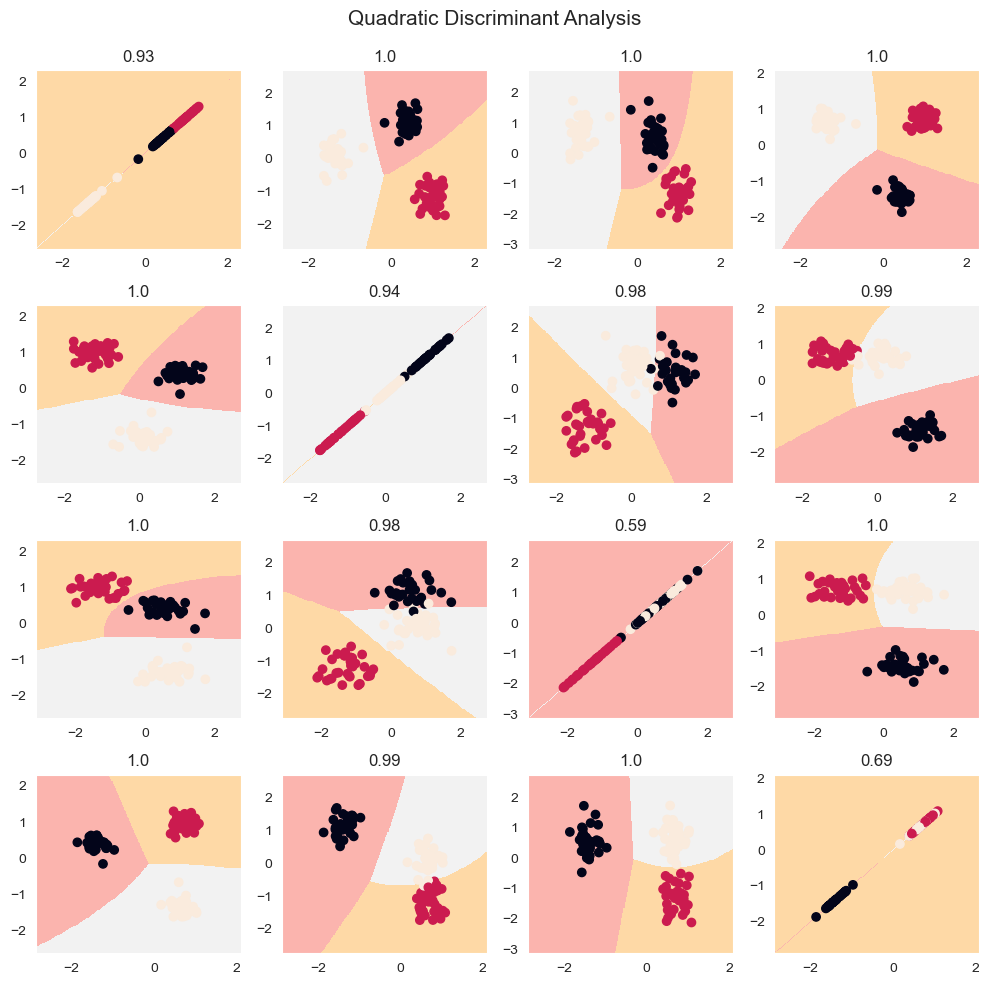

In [32]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis',y=0.98, fontsize=15)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,qda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


In [33]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
sc = StandardScaler()
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()

In [ ]:
import plotly.express as px
df = pd.DataFrame(X[:, 0:3])
fig= px.scatter_3d(df, x=0, y=1, z=2, color=y)
fig.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import numpy as np

# Создаем данные
X = np.random.rand(100, 3)

# Задаем количество кластеров
n_clusters = 3

# Обучаем модель KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)


# Получаем координаты кластерных центров
centers = kmeans.cluster_centers_

# Создаем scatter plot 3D с помощью Plotly Express
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2], color=kmeans.labels_)

# Добавляем кластерные центры
fig.add_scatter3d(x=centers[:,0], y=centers[:,1], z=centers[:,2], mode='markers', marker=dict(size=10, color='red'))

# Назначаем заголовок и метки осей
fig.update_layout(title='3D Scatter Plot with Cluster Centers', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Отображаем график
fig.show()